<a href="https://colab.research.google.com/github/shrutiarya0301/Comparative-Analysis-Of-Data-Related-Skills-And-Salaries/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math

Loading Dataset

In [ ]:
data = pd.read_csv("/content/data_cleaned_2021.csv")
df = pd.DataFrame(data)

In [ ]:
df.head(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


Dataset Cleaning

In [ ]:
df.drop("index", axis =1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,...,0,0,0,0,0,0,0,other scientist,sr,M
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,...,0,1,0,0,0,0,0,data engineer,sr,na
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,...,0,0,0,0,0,0,0,other scientist,na,P
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


In [ ]:
df["job_title_sim"].unique()

array(['data scientist', 'other scientist', 'analyst', 'data engineer',
       'data analitics', 'na', 'data modeler',
       'Data scientist project manager', 'machine learning engineer',
       'director'], dtype=object)

In [ ]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of      index                                          Job Title  \
0        0                                     Data Scientist   
1        1                          Healthcare Data Scientist   
2        2                                     Data Scientist   
3        3                                     Data Scientist   
4        4                                     Data Scientist   
..     ...                                                ...   
737    950           Sr Scientist, Immuno-Oncology - Oncology   
738    951                               Senior Data Engineer   
739    952  Project Scientist - Auton Lab, Robotics Institute   
740    953                               Data Science Manager   
741    955          Research Scientist – Security and Privacy   

                 Salary Estimate  \
0     $53K-$91K (Glassdoor est.)   
1    $63K-$112K (Glassdoor est.)   
2     $80K-$90K (Glassdoor est.)   
3     $56K-$97K (Glassdoor est.)   
4    $8

In [ ]:
df.isnull()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
739,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
740,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = df[df.job_title_sim != "na"]

In [ ]:
df["job_title_sim"].unique()

array(['data scientist', 'other scientist', 'analyst', 'data engineer',
       'data analitics', 'data modeler', 'Data scientist project manager',
       'machine learning engineer', 'director'], dtype=object)

In [ ]:
df["tensor"].unique()

array([0, 1])

In [ ]:
df["Founded"].unique()

array([1973, 1984, 2010, 1965, 1998, 2000, 2008, 2005, 2014, 2009, 2011,
       1968, 1962, 2012, 1781, 1995, 1915, 2013, 1935, 1849, 1952, 1852,
       1997, 1996, 1974, 1969, 1870, 1985,   -1, 2015, 1993, 1958, 1986,
       1999, 1925, 1912, 2002, 1863, 1939, 2016, 1885, 2006, 1948, 2003,
       1927, 1978, 1860, 2017, 1942, 1990, 1988, 2001, 2007, 1992, 1994,
       1977, 2019, 1982, 1937, 1878, 1966, 1971, 1943, 1987, 1945, 1846,
       1851, 1976, 1981, 1970, 1951, 1967, 1961, 1964, 1930, 1917, 1883,
       1887, 2004, 1850, 1902, 1744, 1929, 1947, 1991, 1989, 1928, 1875,
       1913, 1972, 1856, 1983, 1922, 1812, 1914, 1980, 1954, 1830, 1975,
       1899, 1979, 1889])

In [ ]:
df.sort_values(by=['Founded'], axis=0).head(2)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
222,270,Data Analyst,$33K-$62K (Glassdoor est.),"Wednesday, March 11, 2020\n\n\nCommunity Actio...",2.8,Community Action Partnership of San Luis Obisp...,"Parlier, CA","San Luis Obispo, CA",501 - 1000,-1,...,0,0,0,0,0,0,0,analyst,na,na
641,819,"Principal Research Scientist/Team Lead, Medici...",Employer Provided Salary:$120K-$145K,"Principal Research Scientist/Team Lead, Medici...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,-1,...,0,0,0,0,0,0,0,other scientist,sr,P


In [ ]:
df = df[df.Founded !=-1]

In [ ]:
df


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,949,"Principal, Data Science - Advanced Analytics",$86K-$137K (Glassdoor est.),IQVIA is the leading human data science compan...,3.6,IQVIA\n3.6,"Plymouth Meeting, PA","Durham, NC",10000+,2017,...,0,0,0,0,0,0,0,data scientist,sr,M
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P


In [ ]:
df.sort_values(by=['Founded'], axis=0)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
277,347,Data Scientist,$95K-$161K (Glassdoor est.),Overview\n\n\nAt Sotheby’s we use data science...,3.6,Sotheby's\n3.6,"New York, NY","New York, NY",1001 - 5000,1744,...,0,0,0,0,0,0,0,data scientist,na,na
178,210,"Sr. Scientist, Quantitative Translational Scie...",$117K-$206K (Glassdoor est.),Job Description\n\n\nMillennium Pharmaceutical...,3.7,Takeda Pharmaceuticals\n3.7,"Boston, MA","OSAKA, Japan",10000+,1781,...,0,0,0,0,0,0,0,other scientist,sr,M
172,204,Sr. Scientist - Digital & Image Analysis/Compu...,$105K-$198K (Glassdoor est.),Job Description\n\n\nAre you looking for a pat...,3.7,Takeda Pharmaceuticals\n3.7,"San Diego, CA","OSAKA, Japan",10000+,1781,...,0,0,0,0,0,0,0,other scientist,sr,M
342,433,"Associate Director, Platform and DevOps- Data ...",$113K-$196K (Glassdoor est.),Job Description\n\n\nAre you looking for a pat...,3.7,Takeda Pharmaceuticals\n3.7,"Cambridge, MA","OSAKA, Japan",10000+,1781,...,0,1,0,0,0,1,0,data engineer,na,M
289,362,"Data Engineer, Data Engineering and Artifical ...",$71K-$134K (Glassdoor est.),Job Description\n\n\nAre you looking for a pat...,3.7,Takeda Pharmaceuticals\n3.7,"Cambridge, MA","OSAKA, Japan",10000+,1781,...,0,1,1,0,0,1,0,data engineer,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,197,Medical Lab Scientist,$17-$24 Per Hour(Glassdoor est.),Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,Tower Health\n3.6,"West Reading, PA","Reading, PA",5001 - 10000,2017,...,0,0,0,0,0,0,0,other scientist,na,na
320,403,Senior Data Scientist,$95K-$154K (Glassdoor est.),"Req Id: 2475\nJob location: Charlotte, NC, US,...",3.5,Brighthouse Financial\n3.5,"Charlotte, NC","Charlotte, NC",1001 - 5000,2017,...,0,0,0,0,0,0,0,data scientist,sr,M
176,208,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 - 200,2017,...,0,0,1,0,0,0,0,data scientist,sr,na
110,125,Data Engineer,$54K-$102K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 - 500,2019,...,0,0,0,0,0,0,0,data engineer,na,na


In [ ]:
df["Founded"].unique()

array([1973, 1984, 2010, 1965, 1998, 2000, 2008, 2005, 2014, 2009, 2011,
       1968, 1962, 2012, 1781, 1995, 1915, 2013, 1935, 1849, 1952, 1852,
       1997, 1996, 1974, 1969, 1870, 1985, 2015, 1993, 1958, 1986, 1999,
       1925, 1912, 2002, 1863, 1939, 2016, 1885, 2006, 1948, 2003, 1927,
       1978, 1860, 2017, 1942, 1990, 1988, 2001, 2007, 1992, 1994, 1977,
       2019, 1982, 1937, 1878, 1966, 1971, 1943, 1987, 1945, 1846, 1851,
       1976, 1981, 1970, 1951, 1967, 1961, 1964, 1930, 1917, 1883, 1887,
       2004, 1850, 1902, 1744, 1929, 1947, 1991, 1989, 1928, 1875, 1913,
       1972, 1856, 1983, 1922, 1812, 1914, 1980, 1954, 1830, 1975, 1899,
       1979, 1889])

In [ ]:
df1=df[["Founded","Avg Salary(K)",'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim']]

In [ ]:
df1


,Founded,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,...,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
0,1973,72.0,NM,48,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,data scientist
1,1984,87.5,MD,37,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
2,2010,85.0,FL,11,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,data scientist
3,1965,76.5,WA,56,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
4,1998,114.5,NY,23,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2017,111.5,PA,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
737,1830,84.5,MA,191,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,other scientist
738,2006,102.5,TN,15,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,data engineer
739,1984,73.5,PA,37,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,other scientist


In [ ]:

df1=df1[df1.Founded !=-1]
df1.sort_values(by=["Founded"], axis=0)

,Founded,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,...,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
277,1744,128.0,NY,277,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
178,1781,161.5,MA,240,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other scientist
172,1781,151.5,CA,240,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,other scientist
342,1781,154.5,MA,240,0,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,data engineer
289,1781,102.5,MA,240,1,1,1,1,1,0,...,0,0,0,1,1,0,0,1,0,data engineer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2017,42.0,PA,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other scientist
320,2017,124.5,NC,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
176,2017,225.0,CA,4,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,data scientist
110,2019,78.0,NJ,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,data engineer


In [ ]:
df1.set_index("job_title_sim")

,Founded,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
job_title_sim,,,,,,,,,,,,,,,,,,,,
data scientist,1973,72.0,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
data scientist,1984,87.5,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
data scientist,2010,85.0,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
data scientist,1965,76.5,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
data scientist,1998,114.5,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
data scientist,2017,111.5,PA,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
other scientist,1830,84.5,MA,191,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
data engineer,2006,102.5,TN,15,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df1["job_title_sim"].unique()

array(['data scientist', 'other scientist', 'analyst', 'data engineer',
       'data analitics', 'data modeler', 'Data scientist project manager',
       'machine learning engineer', 'director'], dtype=object)

In [ ]:
df1= df1[df1.job_title_sim != "other scientist"]

In [ ]:
df1= df1[df1.job_title_sim != "analyst"]

In [ ]:
df1= df1[df1.job_title_sim != "data modeler"]
df1= df1[df1.job_title_sim != "Data scientist project manager"]
df1= df1[df1.job_title_sim != "machine learning engineer"]
df1= df1[df1.job_title_sim != "director"]

In [ ]:
df1["job_title_sim"].unique()

array(['data scientist', 'data engineer', 'data analitics'], dtype=object)

In [ ]:
df1

,Founded,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,...,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
0,1973,72.0,NM,48,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,data scientist
1,1984,87.5,MD,37,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
2,2010,85.0,FL,11,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,data scientist
3,1965,76.5,WA,56,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
4,1998,114.5,NY,23,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,1988,90.0,MA,33,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,data engineer
734,1851,68.5,MA,170,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
735,2011,87.5,CA,10,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,data engineer
736,2017,111.5,PA,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,data scientist


In [ ]:
p=[]
q=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["Python"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p.append(founded_year)
    q.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q.pop(index)
    p.pop(index)


year=[1720,1740,1760,1780,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,2020]
skill=[]
for i in range(0,16):
  skill.append(statistics.mean(q))

<ipython-input-186-4ff9b3b1e617>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["Python"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p1=[]
q1=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["spark"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p1.append(founded_year)
    q1.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q1) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q1.pop(index)
    p1.pop(index)

skill1=[]
for i in range(0,16):
  skill1.append(statistics.mean(q1))

<ipython-input-187-c538763ebf5b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["spark"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p2=[]
q2=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["aws"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p2.append(founded_year)
    q2.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q2) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q2.pop(index)
    p2.pop(index)

skill2=[]
for i in range(0,16):
  skill2.append(statistics.mean(q2))

<ipython-input-188-ce2ef5b8b5ea>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["aws"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p3=[]
q3=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["excel"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p3.append(founded_year)
    q3.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q3) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q3.pop(index)
    p3.pop(index)

skill3=[]
for i in range(0,16):
  skill3.append(statistics.mean(q3))

<ipython-input-189-c0e4ede7ae32>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["excel"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p4=[]
q4=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["sql"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p4.append(founded_year)
    q4.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q4) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q4.pop(index)
    p4.pop(index)

skill4=[]
for i in range(0,16):
  skill4.append(statistics.mean(q4))

<ipython-input-190-524d807b487a>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["sql"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p5=[]
q5=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["sas"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p5.append(founded_year)
    q5.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q5) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q5.pop(index)
    p5.pop(index)

skill5=[]
for i in range(0,16):
  skill5.append(statistics.mean(q5))

<ipython-input-191-9b57ab7fa0cb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["sas"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p15=[]
q15=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["google_an"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p15.append(founded_year)
    q15.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q15) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q15.pop(index)
    p15.pop(index)
skill15=[]
for i in range(0,16):
  skill15.append(statistics.mean(q15))

<ipython-input-192-52533275a451>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["google_an"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p6=[]
q6=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["keras"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p6.append(founded_year)
    q6.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q6) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q6.pop(index)
    p6.pop(index)

skill6=[]
for i in range(0,16):
  skill6.append(statistics.mean(q6))

<ipython-input-193-74e88e988572>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["keras"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p7=[]
q7=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["pytorch"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p7.append(founded_year)
    q7.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q7) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q7.pop(index)
    p7.pop(index)

skill7=[]
for i in range(0,16):
  skill7.append(statistics.mean(q7))

<ipython-input-194-7ad1317c93fe>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["pytorch"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p8=[]
q8=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["scikit"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p8.append(founded_year)
    q8.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q8) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q8.pop(index)
    p8.pop(index)

skill8=[]
for i in range(0,16):
  skill8.append(statistics.mean(q8))

<ipython-input-195-75d5e5078008>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["scikit"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p9=[]
q9=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["tensor"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p9.append(founded_year)
    q9.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q9) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q9.pop(index)
    p9.pop(index)

skill9=[]
for i in range(0,16):
  skill9.append(statistics.mean(q9))

<ipython-input-196-c68c9ce4f573>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["tensor"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p10=[]
q10=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["hadoop"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p10.append(founded_year)
    q10.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q10) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q10.pop(index)
    p10.pop(index)
skill10=[]
for i in range(0,16):
  skill10.append(statistics.mean(q10))

<ipython-input-197-00f988e653de>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["hadoop"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p11=[]
q11=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["tableau"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p11.append(founded_year)
    q11.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q11) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q11.pop(index)
    p11.pop(index)
skill11=[]
for i in range(0,16):
  skill11.append(statistics.mean(q11))

<ipython-input-198-8cc8bb7c9e5a>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["tableau"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p12=[]
q12=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["bi"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p12.append(founded_year)
    q12.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q12) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q12.pop(index)
    p12.pop(index)

skill12=[]
for i in range(0,16):
  skill12.append(statistics.mean(q12))

<ipython-input-199-72546871a66b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["bi"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p13=[]
q13=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["flink"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p13.append(founded_year)
    q13.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q13) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q13.pop(index)
    p13.pop(index)

skill13=[]
for i in range(0,16):
  skill13.append(statistics.mean(q13))

<ipython-input-200-c7c5aaa2a16f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["flink"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
p14=[]
q14=[]

for founded_year in sorted(df1["Founded"].unique()):
    j= df1[df1["mongo"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()
    p14.append(founded_year)
    q14.append(j)

index=[]

nan_indices = [i for i, value in enumerate(q14) if math.isnan(value)]

for index in sorted(nan_indices, reverse=True):
    q14.pop(index)
    p14.pop(index)

skill14=[]
for i in range(0,16):
  skill14.append(statistics.mean(q14))

<ipython-input-201-6919284144fd>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  j= df1[df1["mongo"]==1][df1["Founded"]==founded_year]["Avg Salary(K)"].mean()


In [ ]:
df1.sort_values(by=["Avg Salary(K)"], axis=0)

,Founded,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,...,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
240,1966,15.5,NY,55,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
286,1987,52.5,CA,34,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,data analitics
648,1912,53.0,MA,109,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
67,1999,56.5,MA,22,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,data scientist
592,1925,58.5,IL,96,1,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,data engineer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2017,225.0,CA,4,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,data scientist
103,1935,237.5,DC,86,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
708,1912,254.0,IL,109,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,data scientist
354,1912,254.0,IL,109,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,data scientist


In [ ]:
df1.median(axis=0)

<ipython-input-203-6570d856428d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.median(axis=0)


Founded          1996.0
Avg Salary(K)     107.5
Age                25.0
Python              1.0
spark               0.0
aws                 0.0
excel               0.0
sql                 1.0
sas                 0.0
keras               0.0
pytorch             0.0
scikit              0.0
tensor              0.0
hadoop              0.0
tableau             0.0
bi                  0.0
flink               0.0
mongo               0.0
google_an           0.0
dtype: float64

In [ ]:
group =df1.groupby(["job_title_sim"])
group


In [ ]:
ds= group.get_group(("data scientist"))
ds

,Founded,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,...,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
0,1973,72.0,NM,48,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,data scientist
1,1984,87.5,MD,37,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
2,2010,85.0,FL,11,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,data scientist
3,1965,76.5,WA,56,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
4,1998,114.5,NY,23,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,1996,106.5,MA,25,1,0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,data scientist
722,1968,140.0,IL,53,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,data scientist
723,1958,77.5,VA,63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
734,1851,68.5,MA,170,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,data scientist


In [ ]:
x1=[]
y1=[]
for founded_year in sorted(ds["Founded"].unique()):
    avg_salary = ds[ds["Founded"] == founded_year]["Avg Salary(K)"].mean()
    x1.append(founded_year)
    y1.append(avg_salary)
avg1=round((statistics.mean(y1)),2)




In [ ]:
da=group.get_group(("data analitics"))
da.sort_values("Founded")

,Founded,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,...,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
333,1981,62.5,CT,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,data analitics
479,1981,62.5,CT,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,data analitics
652,1981,62.5,CT,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,data analitics
286,1987,52.5,CA,34,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,data analitics
233,1992,114.5,NY,29,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,data analitics
387,1995,66.5,IL,26,1,0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,data analitics
588,1995,66.5,IL,26,1,0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,data analitics
70,2015,66.5,IN,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,data analitics


In [ ]:
x2=[]
y2=[]
for founded_year in sorted(da[("Founded")].unique()):
    avg_salary = da[da["Founded"] == founded_year]["Avg Salary(K)"].mean()
    x2.append(founded_year)
    y2.append(avg_salary)
avg2=round((statistics.mean(y2)),2)

In [ ]:
x2,y2

([1981, 1987, 1992, 1995, 2015], [62.5, 52.5, 114.5, 66.5, 66.5])

In [ ]:
de=group.get_group(("data engineer"))
de.sort_values(["Founded"])

,Founded,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,...,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
342,1781,154.5,MA,240,0,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,data engineer
289,1781,102.5,MA,240,1,1,1,1,1,0,...,0,0,0,1,1,0,0,1,0,data engineer
503,1781,154.5,MA,240,0,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,data engineer
676,1781,154.5,MA,240,0,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,data engineer
309,1851,92.0,MA,170,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,data engineer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2015,109.0,VA,6,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,data engineer
301,2015,90.5,IN,6,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,data engineer
587,2017,118.5,VA,4,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,data engineer
138,2017,132.5,FL,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,data engineer


In [ ]:



x3=[]
y3=[]
for founded_year in sorted(de["Founded"].unique()):
    avg_salary = de[de["Founded"] == founded_year]["Avg Salary(K)"].mean()
    x3.append(founded_year)
    y3.append(avg_salary)
avg3=round((statistics.mean(y3)),2)
print(x3,y3)

[1781, 1851, 1899, 1914, 1915, 1925, 1939, 1945, 1948, 1958, 1968, 1972, 1981, 1982, 1985, 1988, 1990, 1993, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2019] [141.5, 92.0, 81.0, 110.5, 99.0, 58.5, 73.0, 106.5, 77.5, 98.0, 92.0, 83.0, 100.0, 115.33333333333333, 106.0, 111.75, 112.5, 92.5, 120.75, 115.625, 91.7, 114.0, 109.0, 110.5, 100.0, 76.875, 64.5, 97.0, 98.3, 89.75, 121.33333333333333, 108.33333333333333, 170.14285714285714, 95.25, 97.0, 94.5, 65.0, 107.625, 125.5, 78.0]


In [ ]:
fig = plt.figure(figsize=(8,15))

<Figure size 800x1500 with 0 Axes>

OrderedDict([('bi', [105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629, 105.42129629629629]), ('google_an', [106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333, 106.33333333333333]), ('tableau', [107.57322916666666, 107.57322916666666, 107.57322916666666, 107.57322916666666, 107.57322916666666, 107.57322916666666, 107.57322916666666, 107.57322916666666, 107.57322916666666, 107.57322916666666, 107.57322916666666, 107.57322916666666, 107.57322916666666, 107.57322916666666, 107.57322916666666, 107.573

Text(1740, 71, 'Avg salary of Data engineer:-100.03')

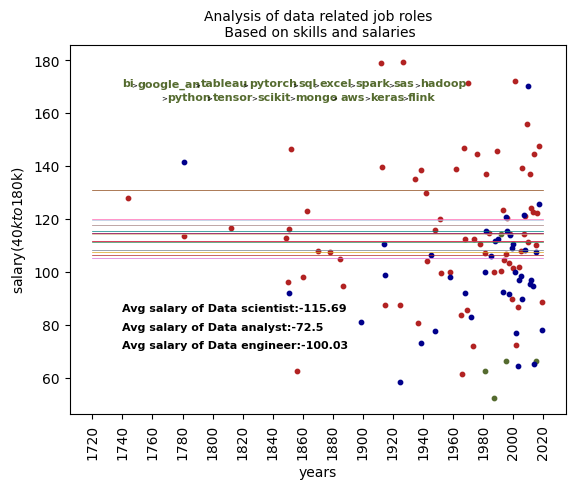

In [ ]:
from matplotlib.ticker import MultipleLocator
from collections import OrderedDict

fig, ax =plt.subplots()

plt.xticks(df1["Founded"], rotation= "vertical")
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.plot(year,skill,color="orange", linewidth=0.5)
ax.plot(year,skill1,color="rosybrown", linewidth=0.5)
ax.plot(year,skill2,color="lightsteelblue" ,linewidth=0.5)
ax.plot(year,skill3,color="crimson" ,linewidth=0.5)
ax.plot(year,skill4,color="seagreen", linewidth=0.5)
ax.plot(year,skill5,color="tan", linewidth=0.5)
ax.plot(year,skill6,color="hotpink", linewidth=0.5)
ax.plot(year,skill7,color="slategrey", linewidth=0.5)
ax.plot(year,skill8,color="lightcoral", linewidth=0.5)
ax.plot(year,skill9,color="teal", linewidth=0.5)
ax.plot(year,skill10,color="purple", linewidth=0.5)
ax.plot(year,skill11,color="goldenrod", linewidth=0.5)
ax.plot(year,skill12,color="orchid", linewidth=0.5)
ax.plot(year,skill13,color="saddlebrown", linewidth=0.5)
ax.plot(year,skill14,color="darkgrey", linewidth=0.5)
ax.plot(year,skill15,color="firebrick", linewidth=0.5)
ax.scatter(x1,y1, data = None, c = "firebrick",s=10)
ax.scatter(x2,y2, data = None, c = "darkolivegreen",s=10)
ax.scatter(x3,y3, data = None, c = "darkblue",s=10)
ax.set_ylabel("salary($40k to $180k)")
ax.set_xlabel("years")
ax.set_title("Analysis of data related job roles\n Based on skills and salaries",
             fontdict={'fontsize':10})
list_value=[skill,skill1,skill2,skill3,skill4,skill5,skill6,skill7,skill8,skill9,skill10,skill11,skill12,skill13,skill14,skill15]
list_key=["Python","spark","aws","excel","sql","sas","keras","pytorch","scikit","tensor","hadoop","tableau","bi","flink","mongo","google_an"]
d={}
for key in list_key:
  for value in list_value:
    d[key]=value
    list_value.remove(value)
    break
sorted_d=OrderedDict(sorted(d.items(),key=lambda items:items[1]))
print(sorted_d)
print(sorted_d.keys())
ax.text(1740,170,"bi",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1746,170,">",fontsize="5")
ax.text(1750,170,"google_an",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1788,170,">",fontsize="5")
ax.text(1792,170,"tableau",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1820,170,">",fontsize="5")
ax.text(1824,170,"pytorch",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1853,170,">",fontsize="5")
ax.text(1857,170,"sql",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1867,170,">",fontsize="5")
ax.text(1871,170,"excel",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1891,170,">",fontsize="5")
ax.text(1895,170,"spark",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1917,170,">",fontsize="5")
ax.text(1920,170,"sas",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1934,170,">",fontsize="5")
ax.text(1938,170,"hadoop",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1766,165,">",fontsize="5")
ax.text(1770,165,"python",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1796,165,">",fontsize="5")
ax.text(1800,165,"tensor",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1826,165,">",fontsize="5")
ax.text(1830,165,"scikit",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1851,165,">",fontsize="5")
ax.text(1855,165,"mongo",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1879,165,">",fontsize="5")
ax.text(1885,165,"aws",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1901,165,">",fontsize="5")
ax.text(1905,165,"keras",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1926,165,">",fontsize="5")
ax.text(1930,165,"flink",c ="darkolivegreen",fontsize=8,fontweight="bold")
ax.text(1740,85,"Avg salary of Data scientist:-"+ str(avg1),fontsize=8,fontweight="bold")

ax.text(1740,78,"Avg salary of Data analyst:-"+ str(avg2),fontsize=8,fontweight="bold")
ax.text(1740,71,"Avg salary of Data engineer:-"+ str(avg3),fontsize=8,fontweight="bold")